In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [28]:
flights_combined_data_083 = pd.read_parquet('flights_combined_data_083.parquet')

In [29]:
flights_combined_data_083

,recording_time,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,...,bleedOnStatus-2b,bleedOverpressCas-2a,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,50,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.03125,-0.0625,0.00000,0.00000,NaN,NaN,0.875
2,100,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,150,26.0,12.0,2022.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543891,3555800,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.06250,0.0625,0.03125,0.03125,NaN,NaN,0.750
1543892,3555850,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1543893,3555900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543894,3555950,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN


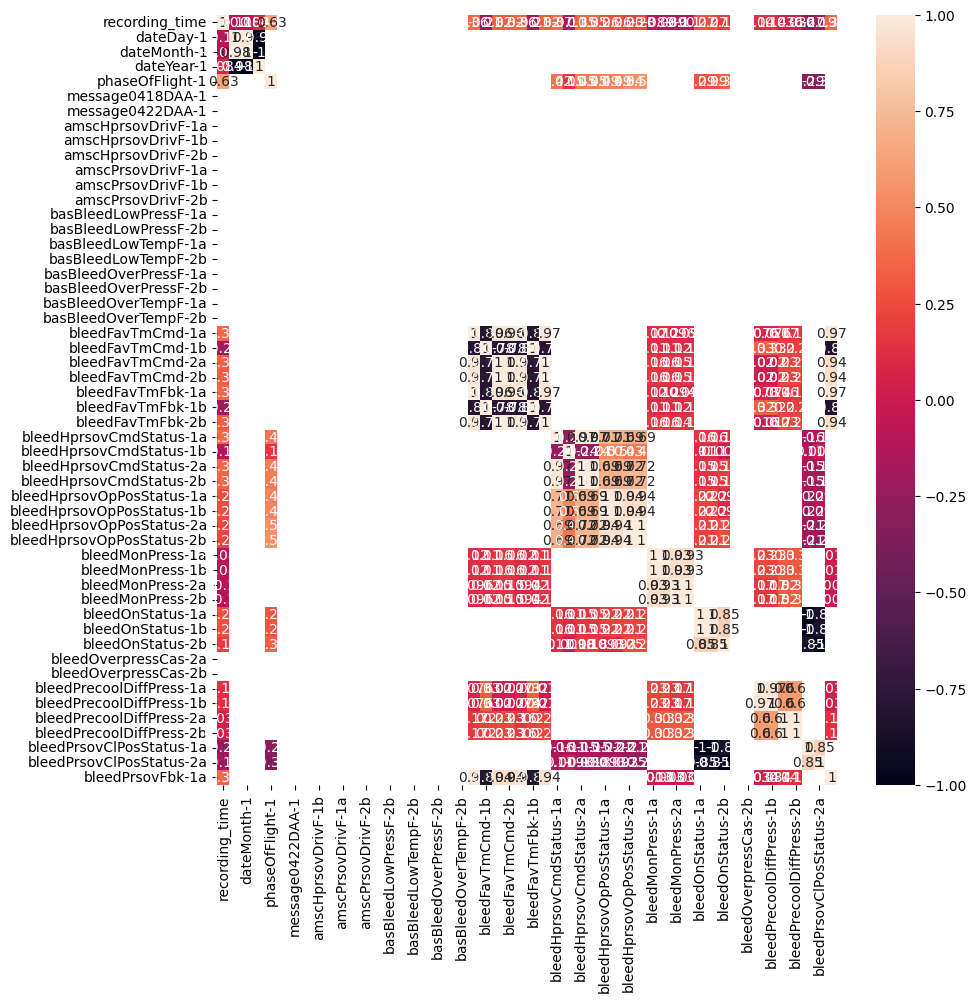

In [30]:
plt.figure(figsize = (10, 10))
corr_matrix = flights_combined_data_083.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

recording_time
dateDay-1
dateMonth-1
dateYear-1
phaseOfFlight-1
message0418DAA-1
message0422DAA-1
amscHprsovDrivF-1a
amscHprsovDrivF-1b
amscHprsovDrivF-2b
amscPrsovDrivF-1a
amscPrsovDrivF-1b
amscPrsovDrivF-2b
basBleedLowPressF-1a
basBleedLowPressF-2b
basBleedLowTempF-1a
basBleedLowTempF-2b
basBleedOverPressF-1a
basBleedOverPressF-2b
basBleedOverTempF-1a
basBleedOverTempF-2b
bleedFavTmCmd-1a
bleedFavTmCmd-1b


C:\Users\Inteli\AppData\Local\Temp\ipykernel_17080\401696385.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


bleedFavTmCmd-2a
bleedFavTmCmd-2b
bleedFavTmFbk-1a
bleedFavTmFbk-1b
bleedFavTmFbk-2b
bleedHprsovCmdStatus-1a
bleedHprsovCmdStatus-1b
bleedHprsovCmdStatus-2a
bleedHprsovCmdStatus-2b
bleedHprsovOpPosStatus-1a
bleedHprsovOpPosStatus-1b
bleedHprsovOpPosStatus-2a
bleedHprsovOpPosStatus-2b
bleedMonPress-1a
bleedMonPress-1b
bleedMonPress-2a
bleedMonPress-2b
bleedOnStatus-1a
bleedOnStatus-1b
bleedOnStatus-2b
bleedOverpressCas-2a
bleedOverpressCas-2b
bleedPrecoolDiffPress-1a
bleedPrecoolDiffPress-1b
bleedPrecoolDiffPress-2a
bleedPrecoolDiffPress-2b
bleedPrsovClPosStatus-1a
bleedPrsovClPosStatus-2a
bleedPrsovFbk-1a


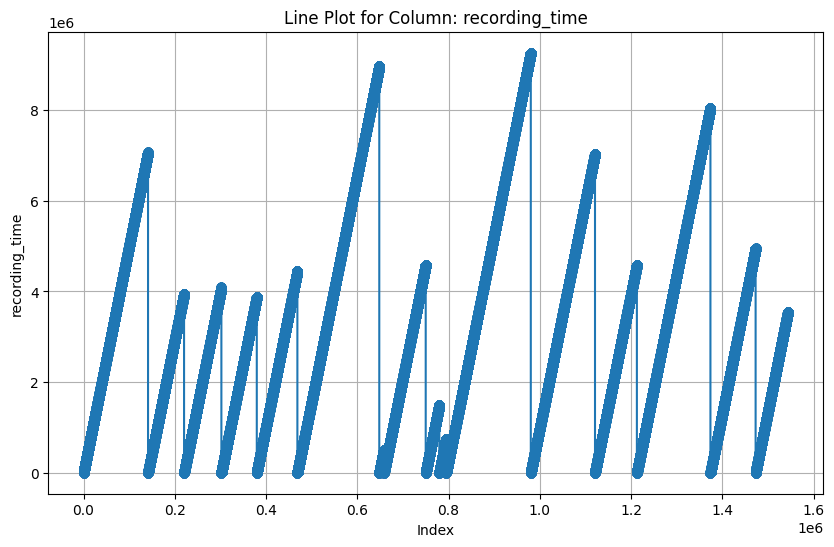

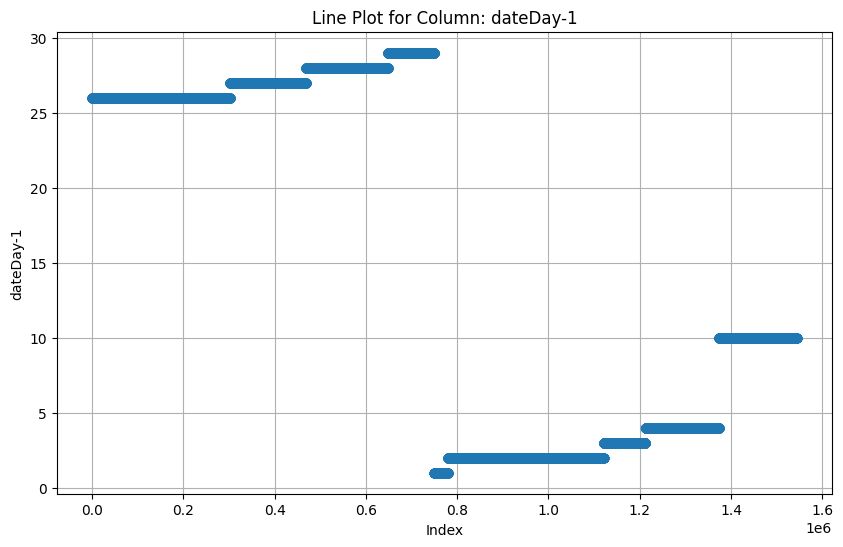

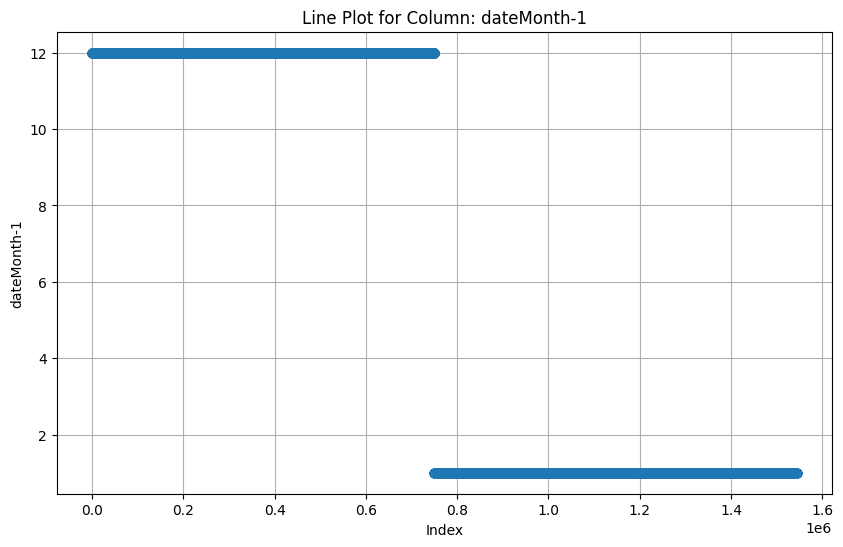

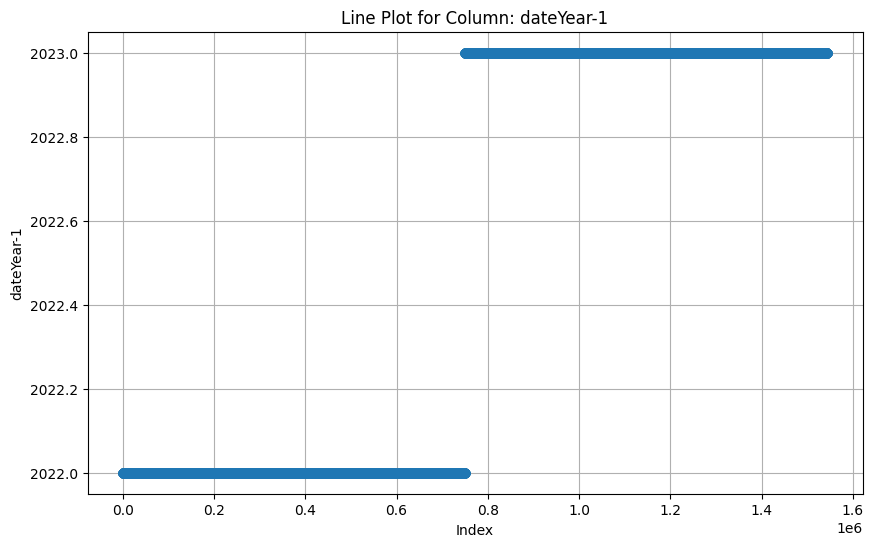

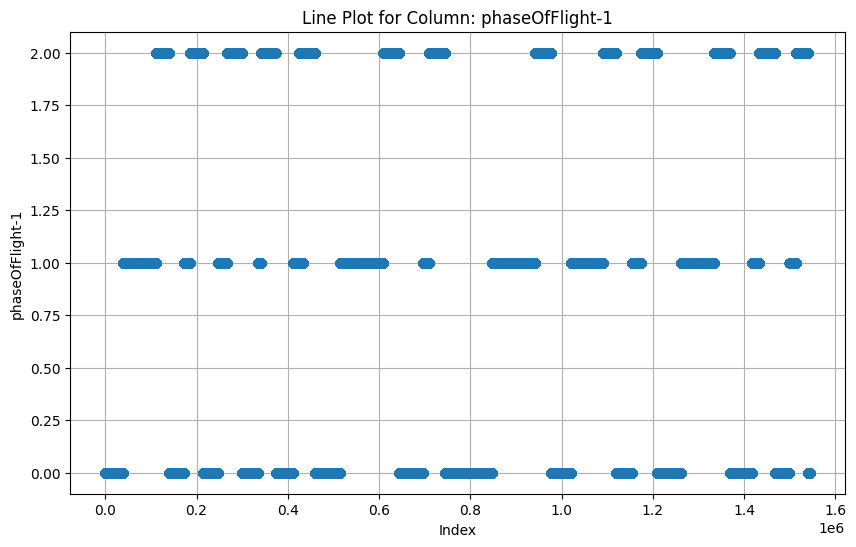

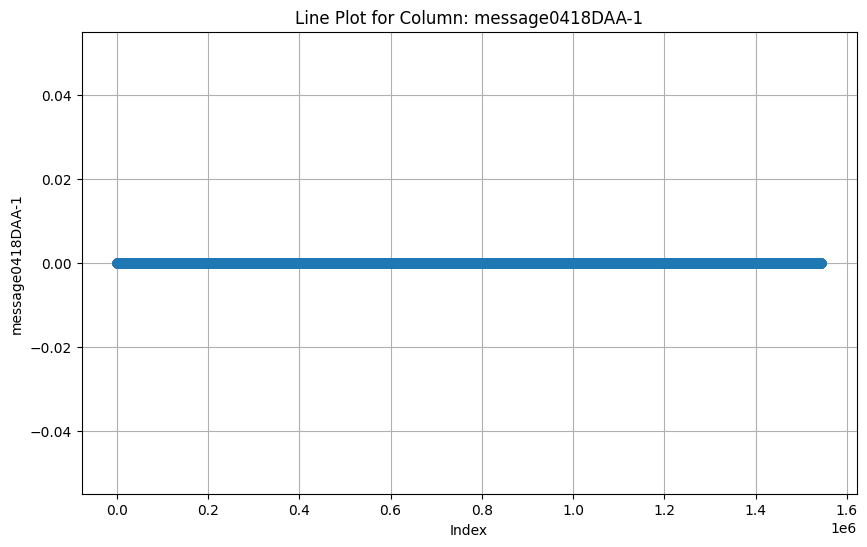

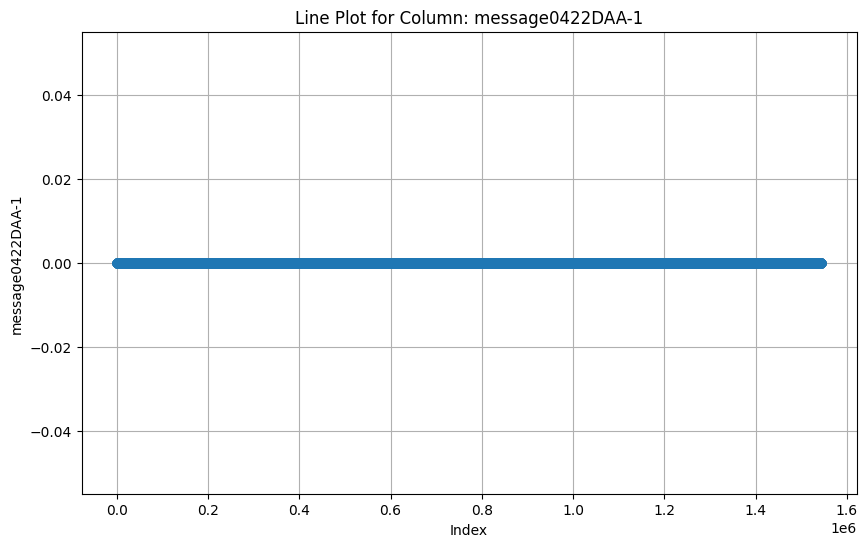

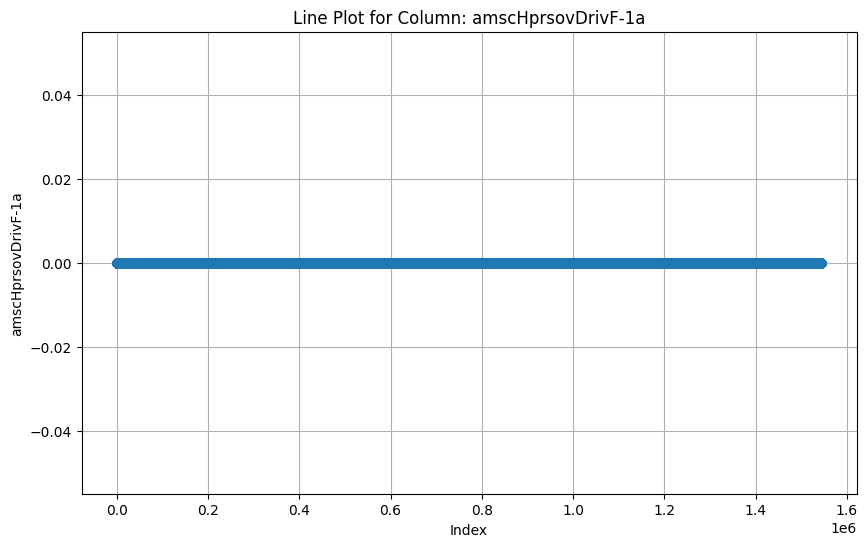

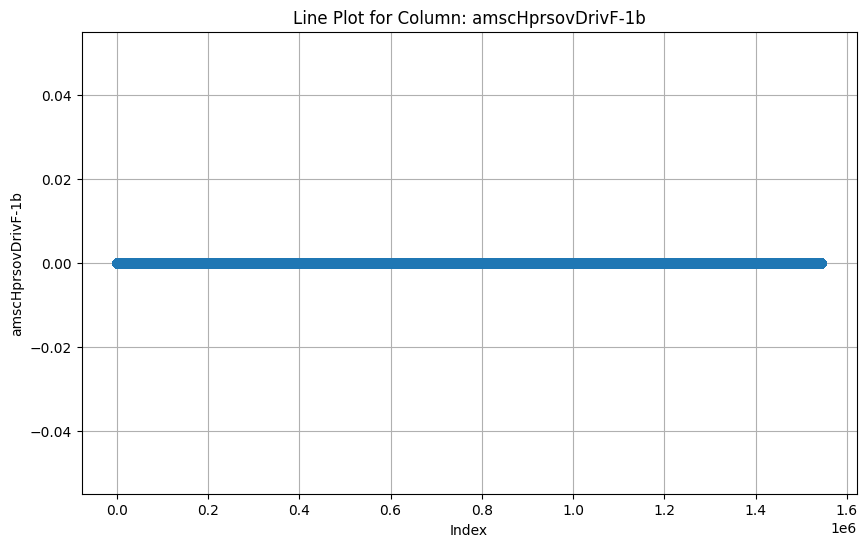

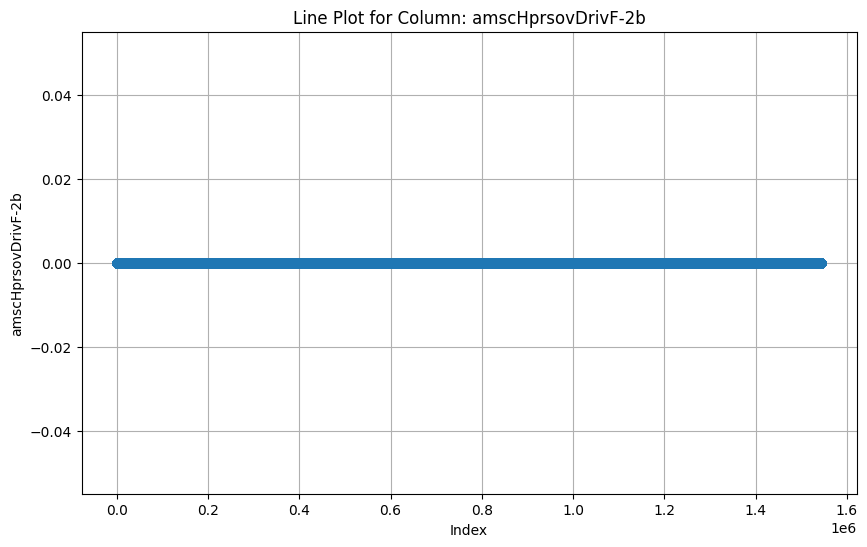

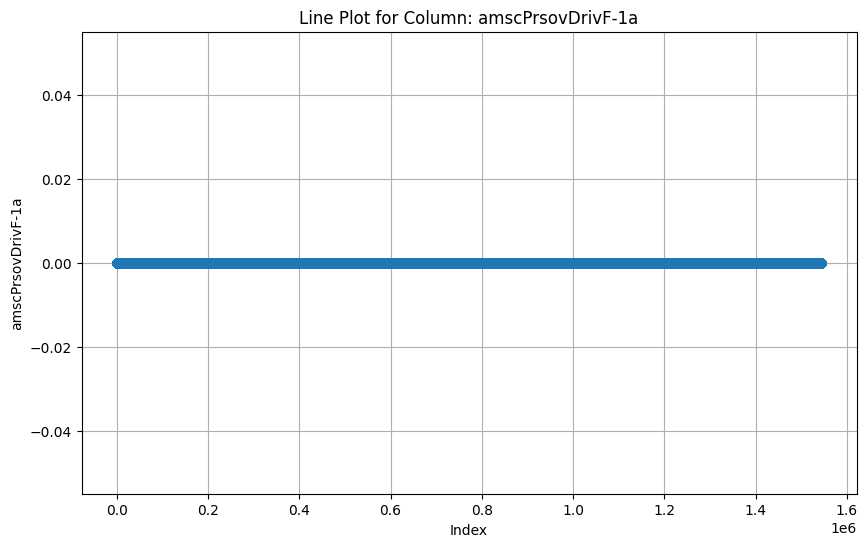

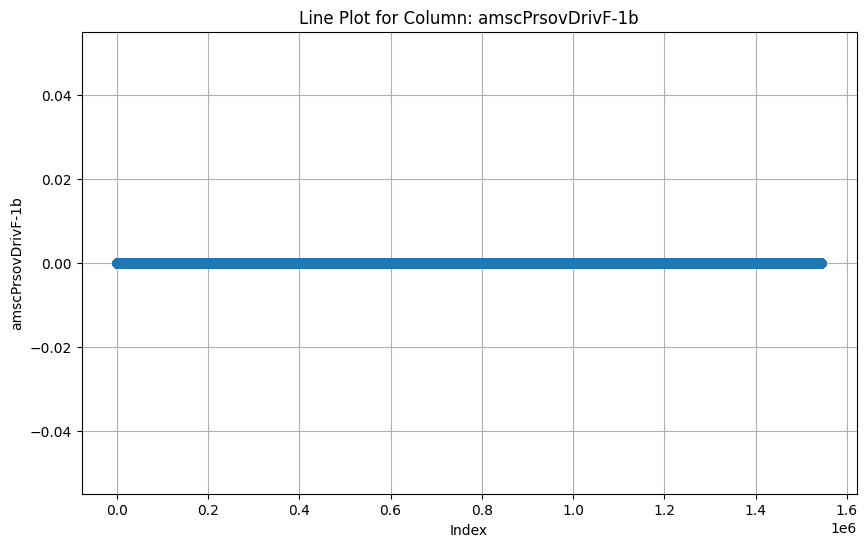

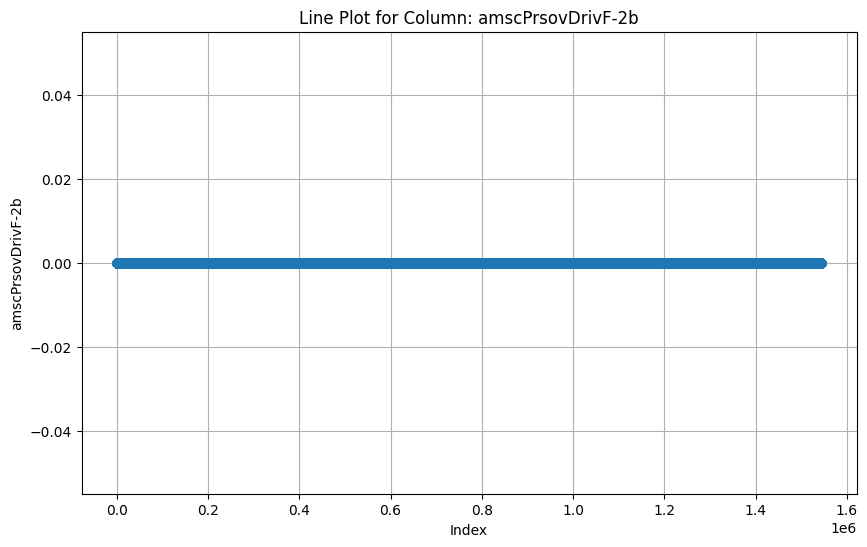

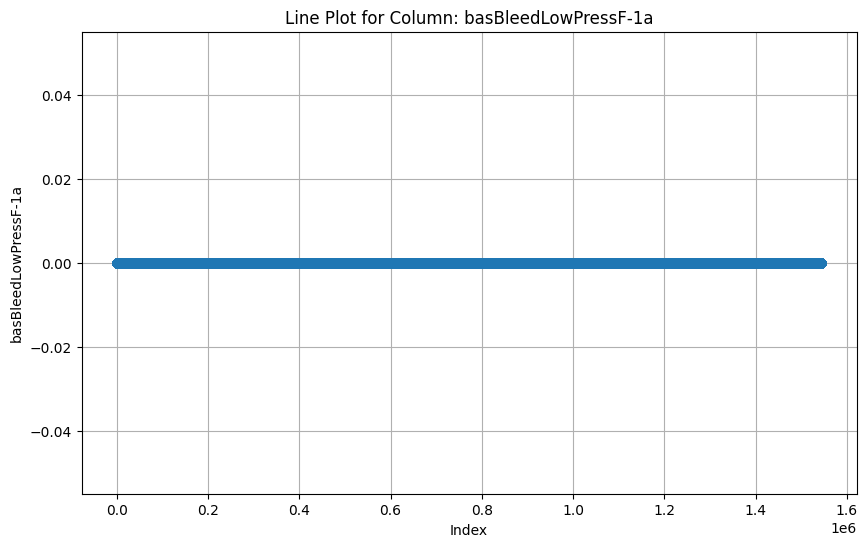

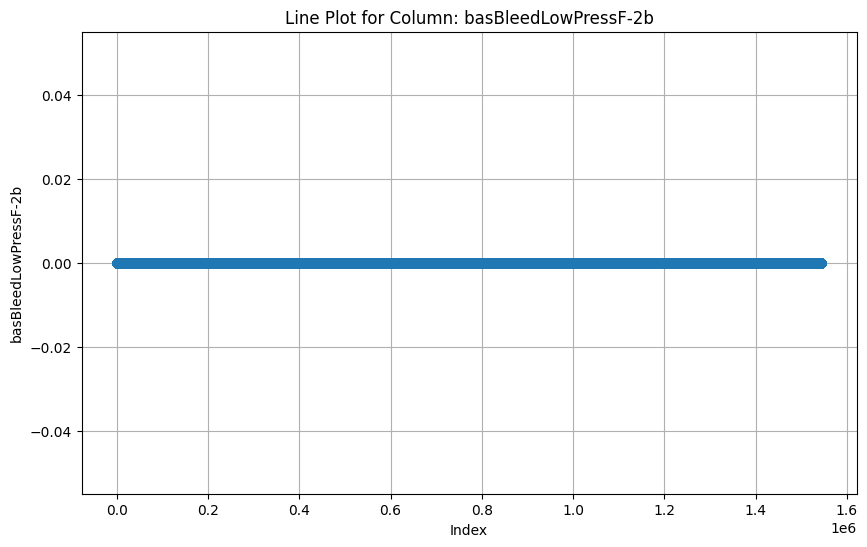

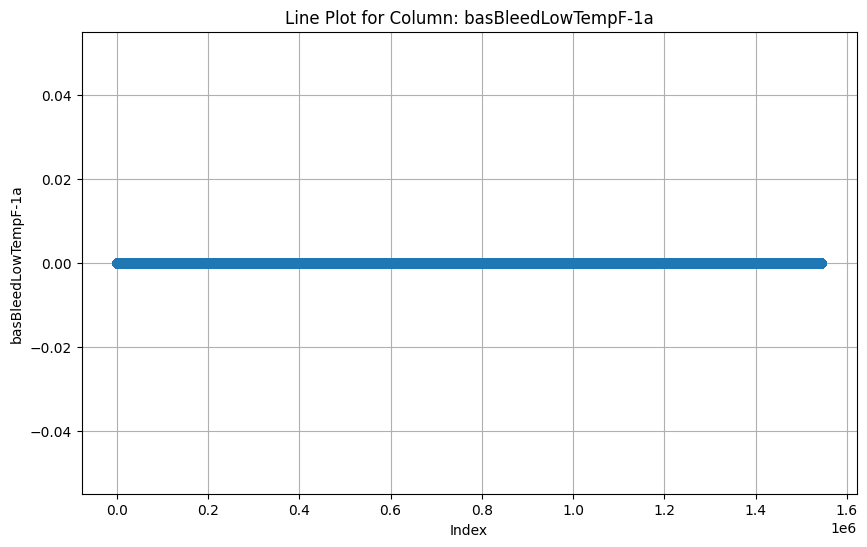

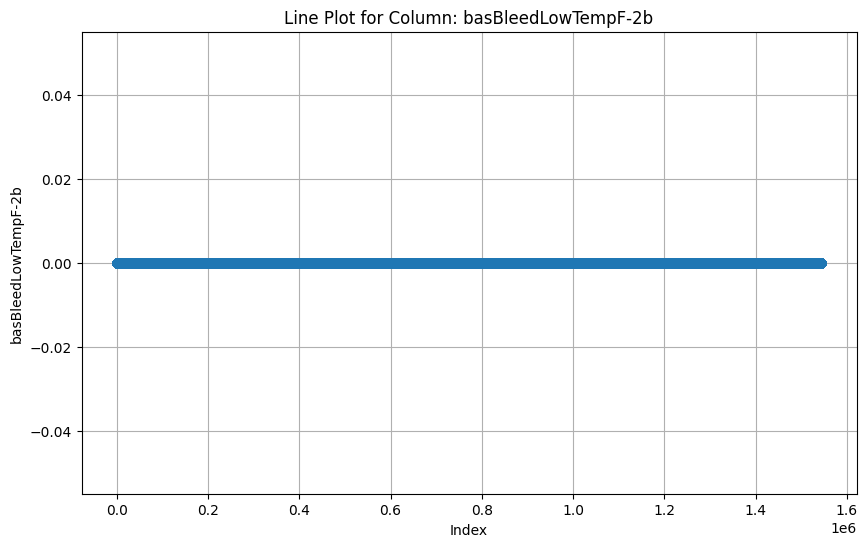

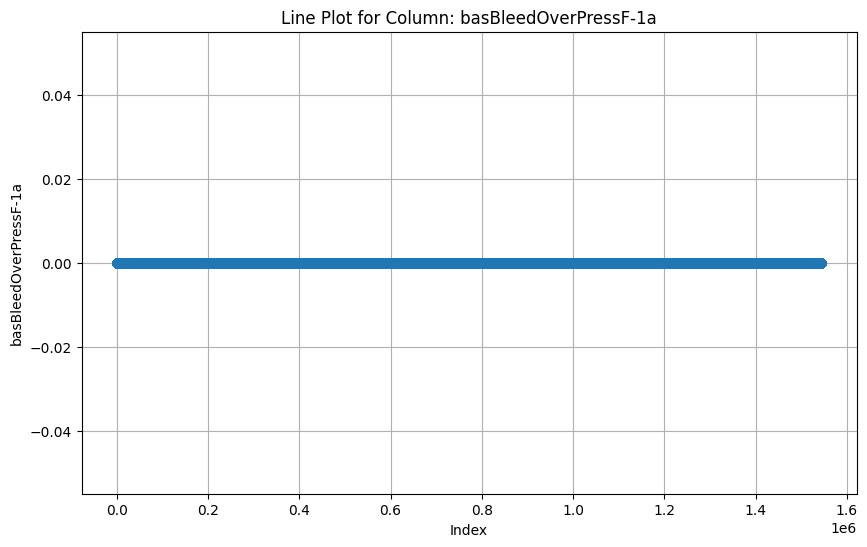

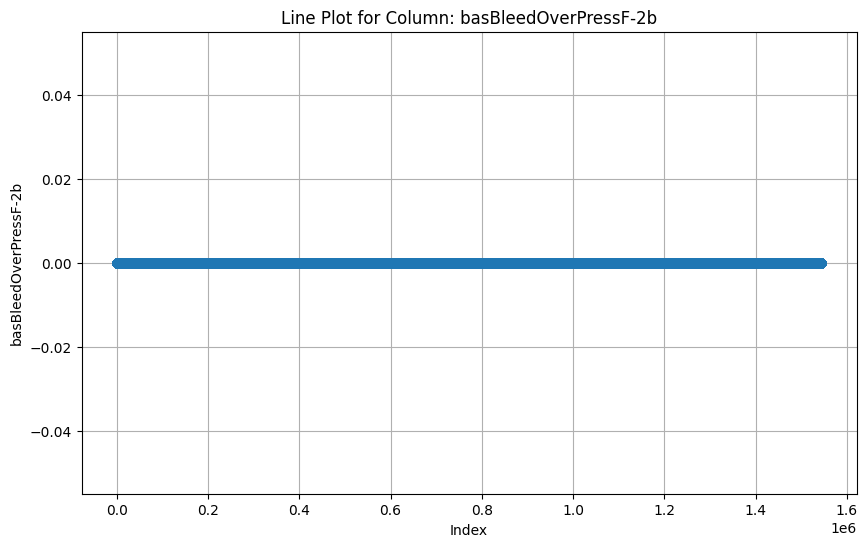

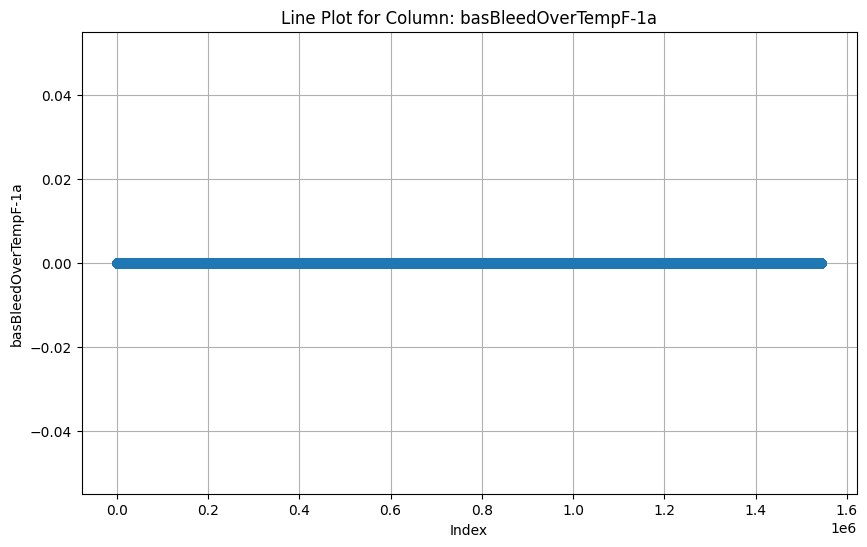

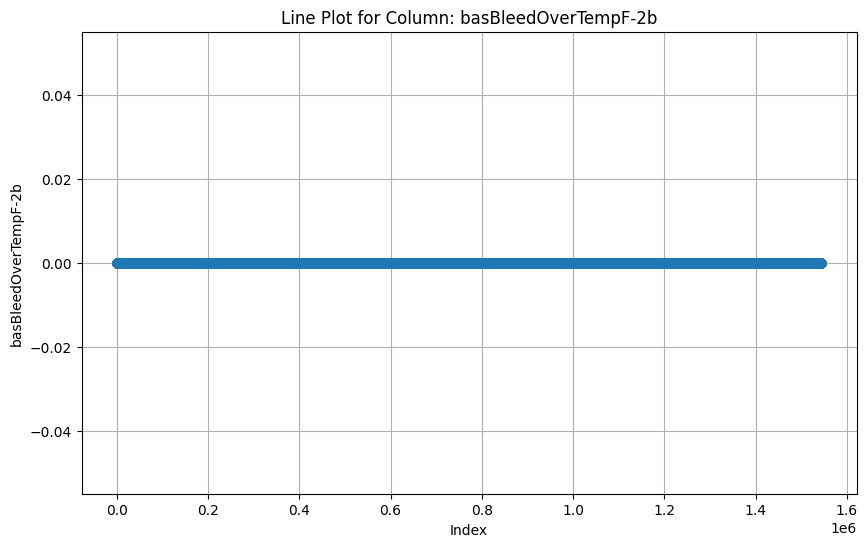

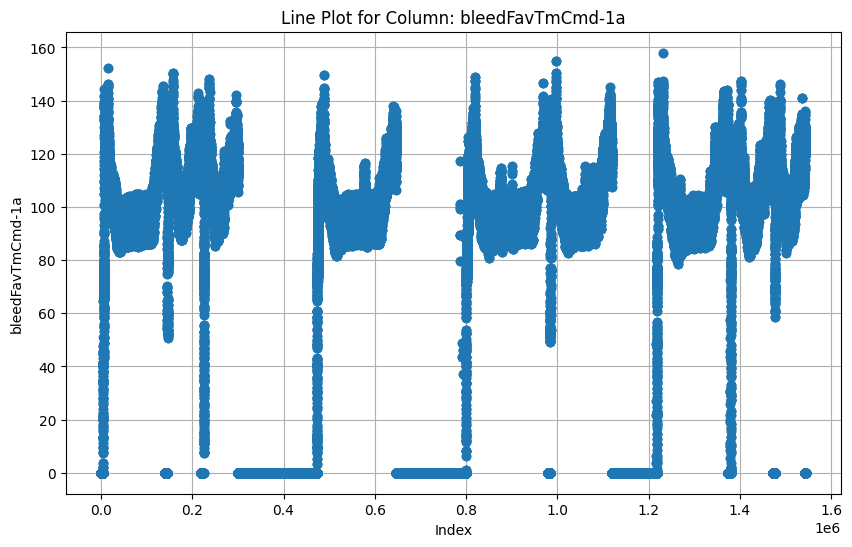

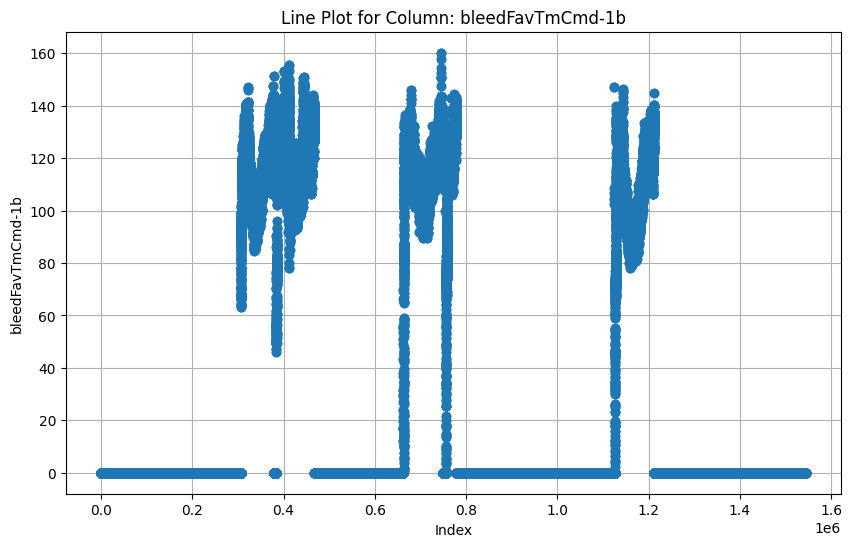

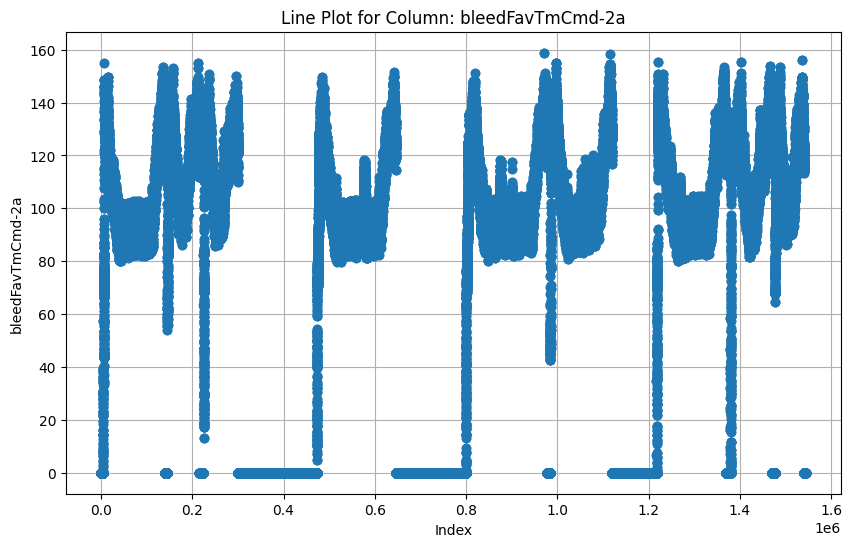

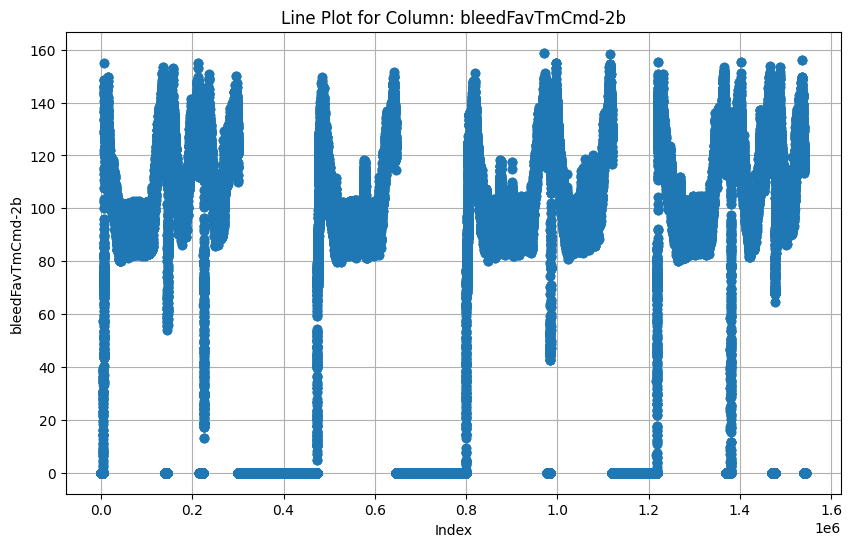

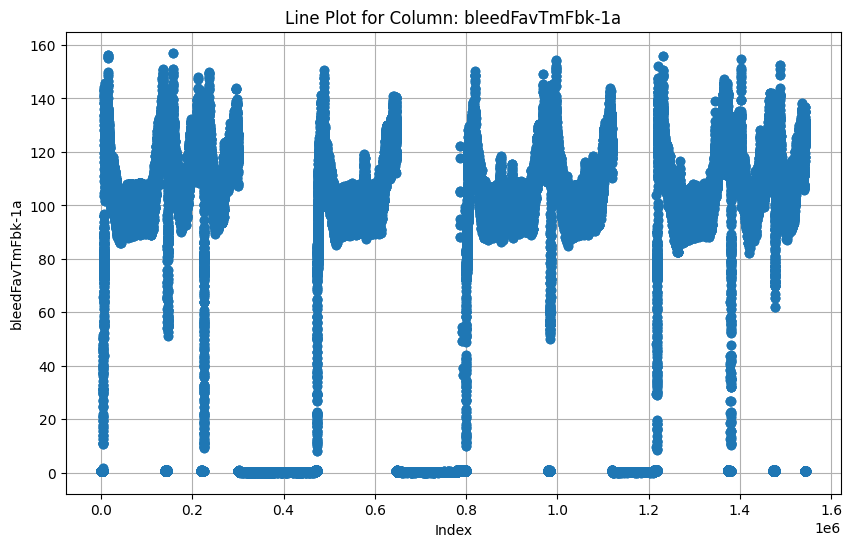

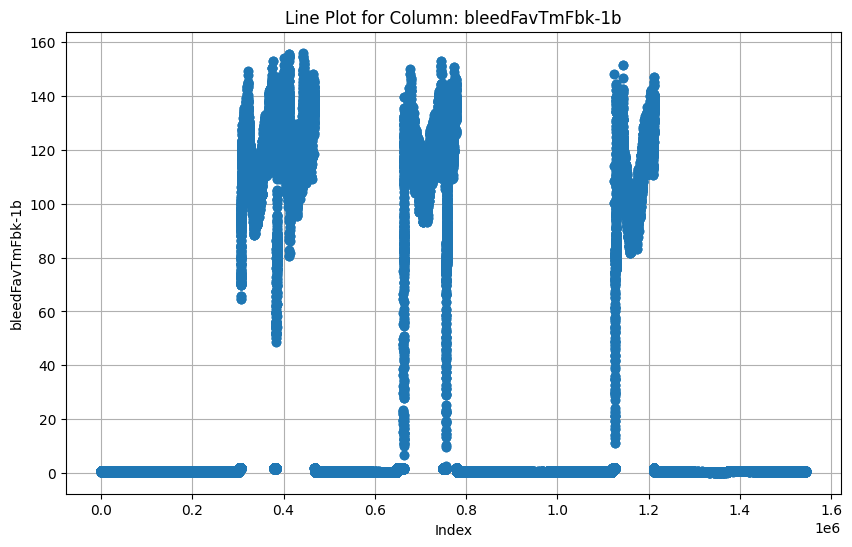

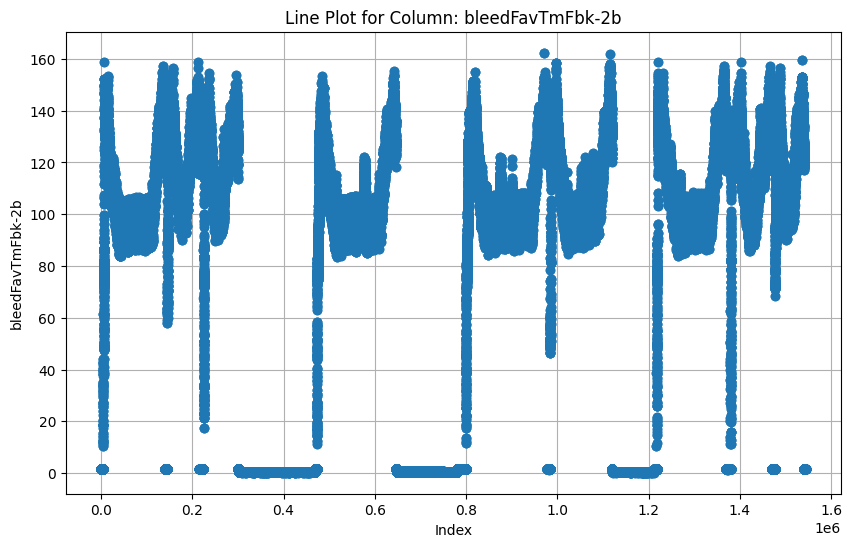

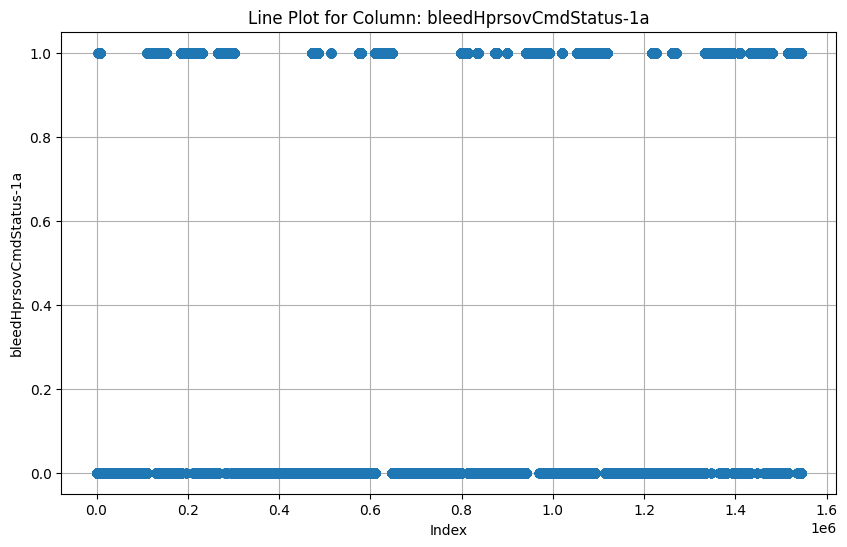

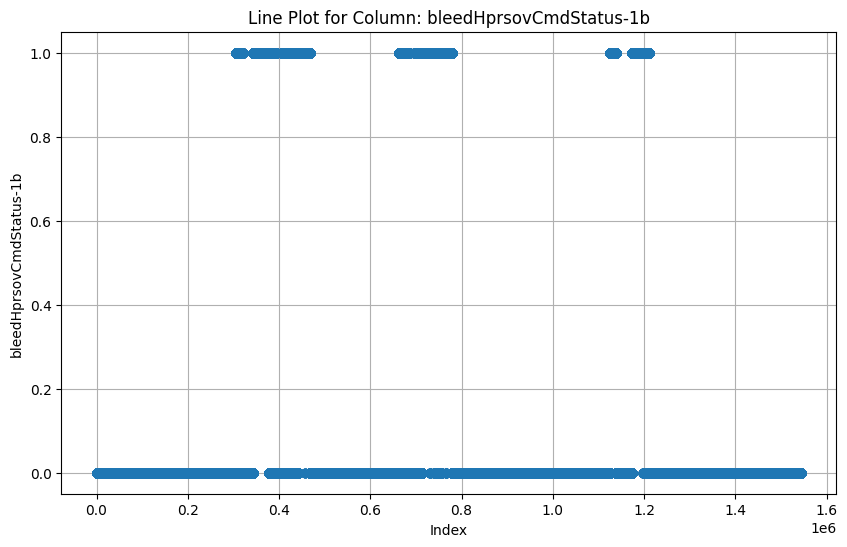

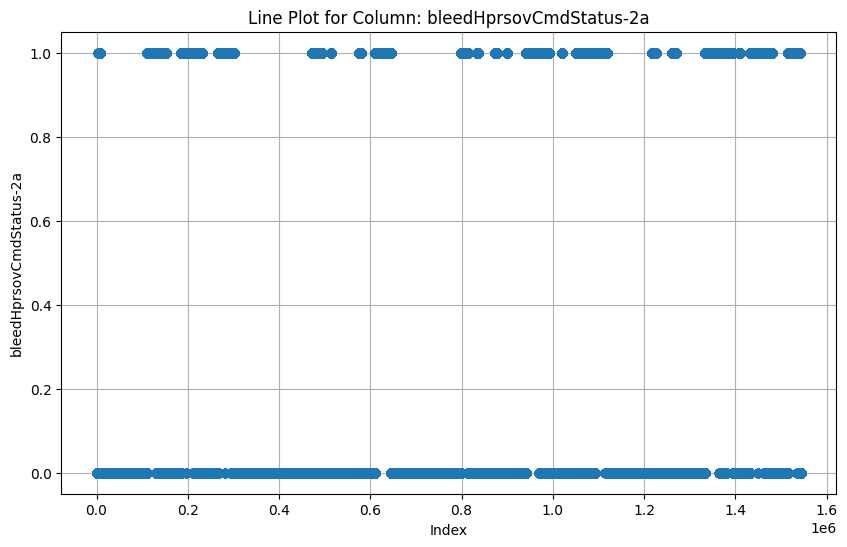

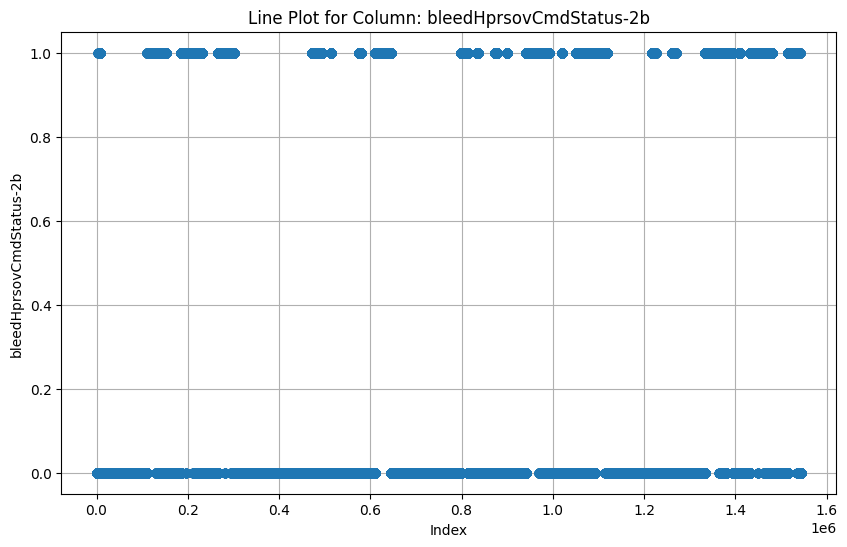

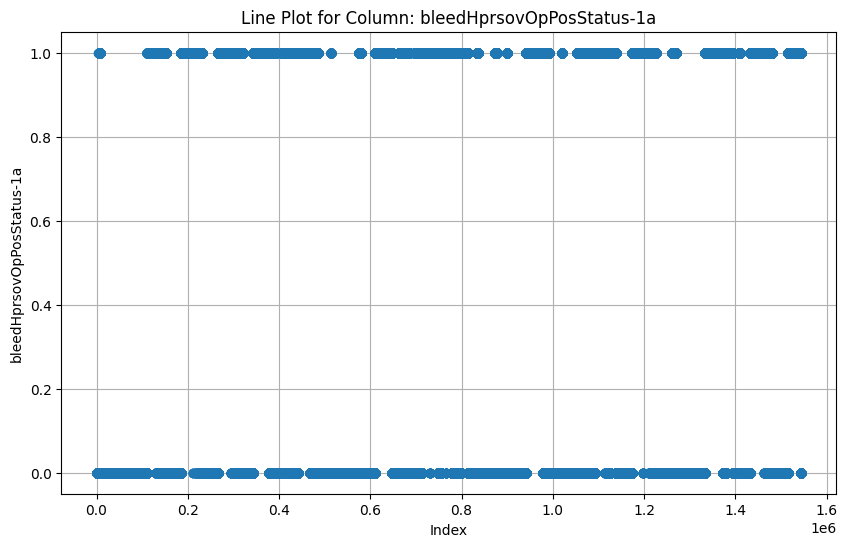

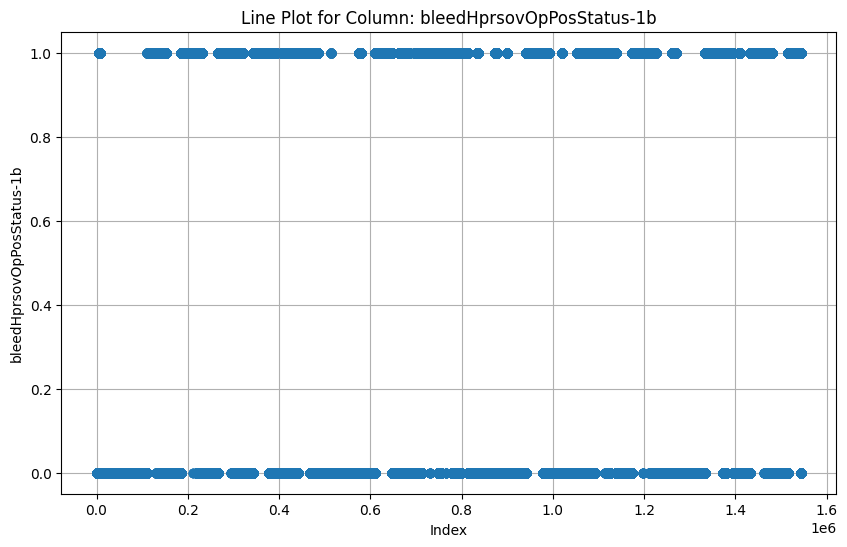

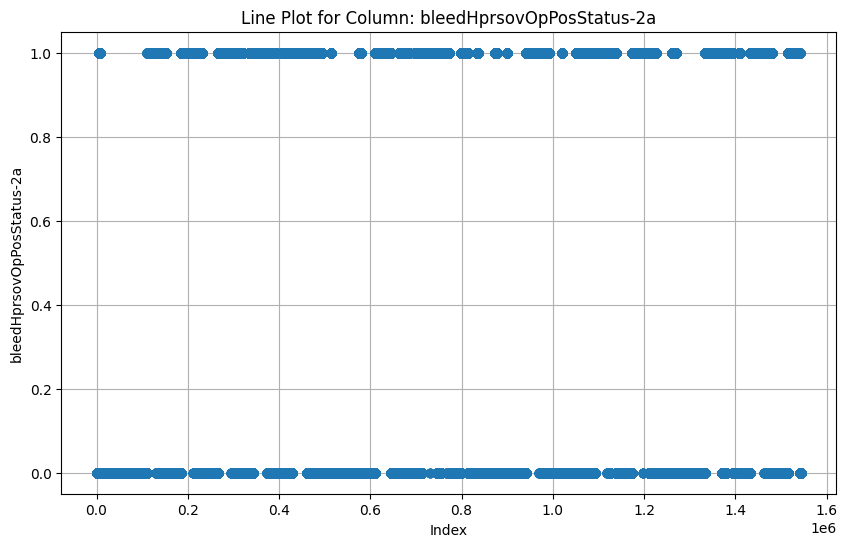

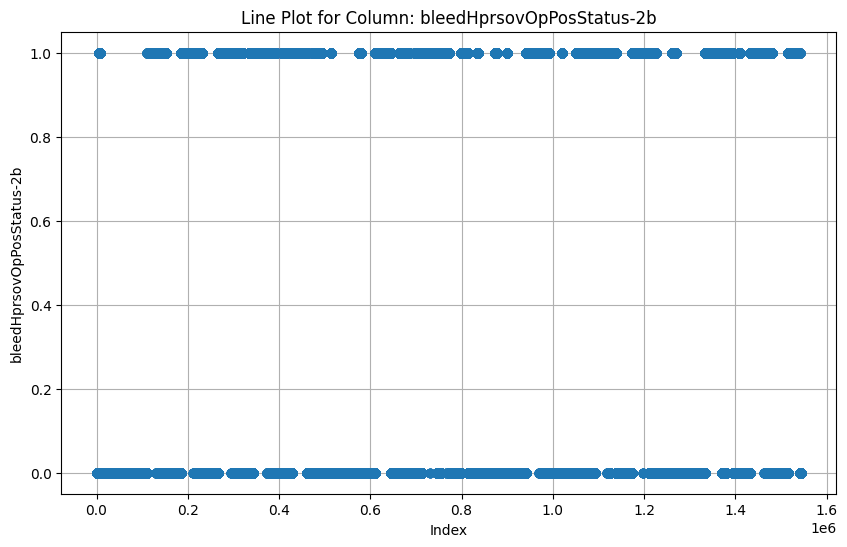

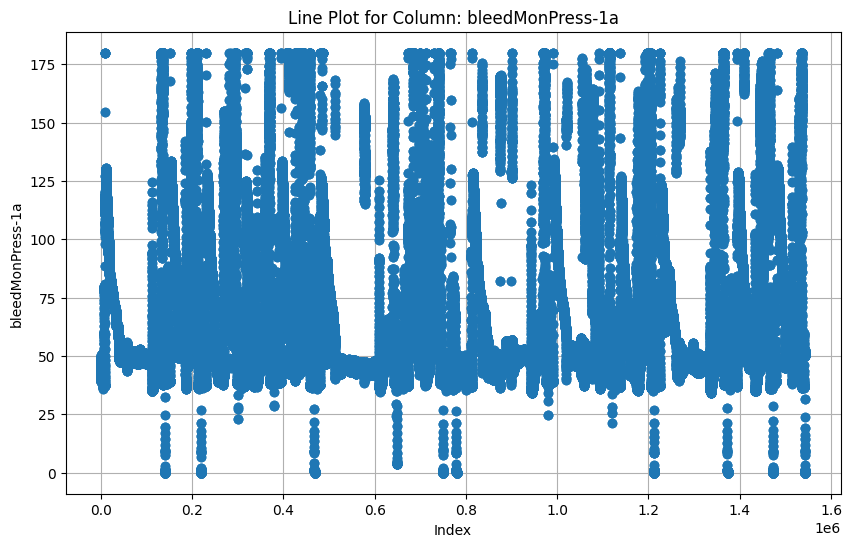

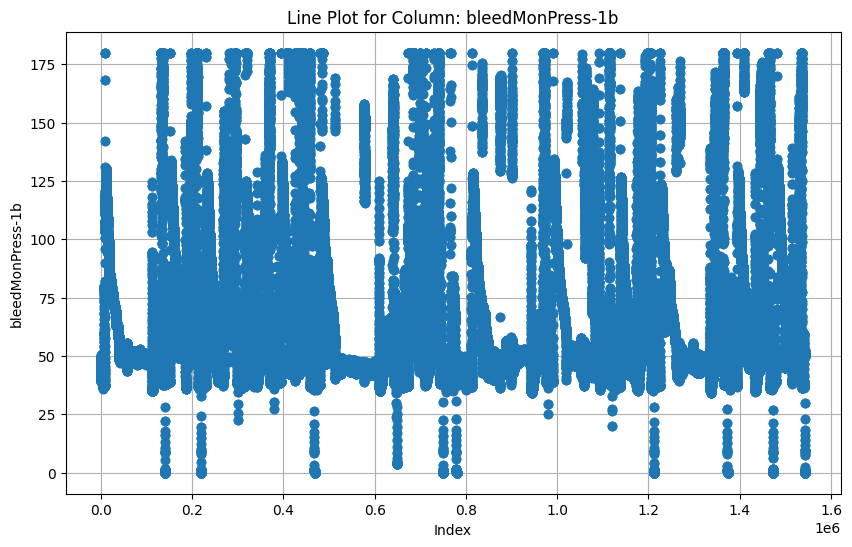

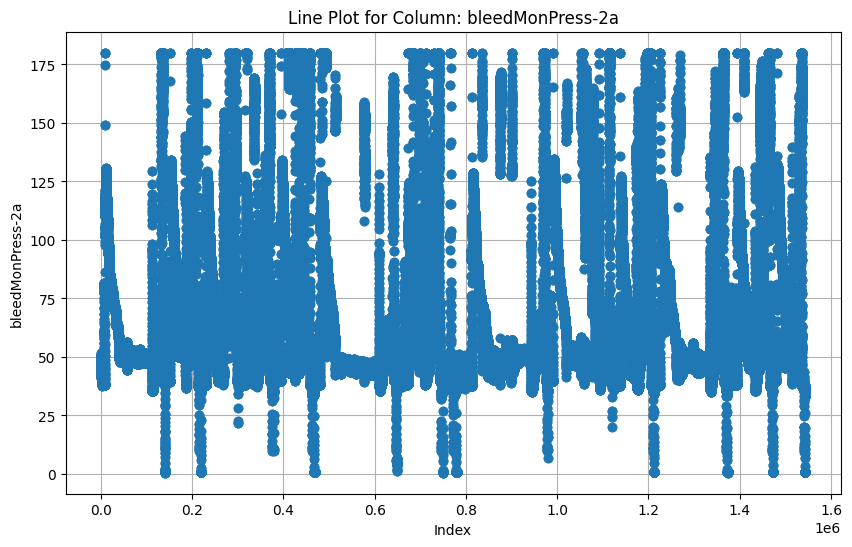

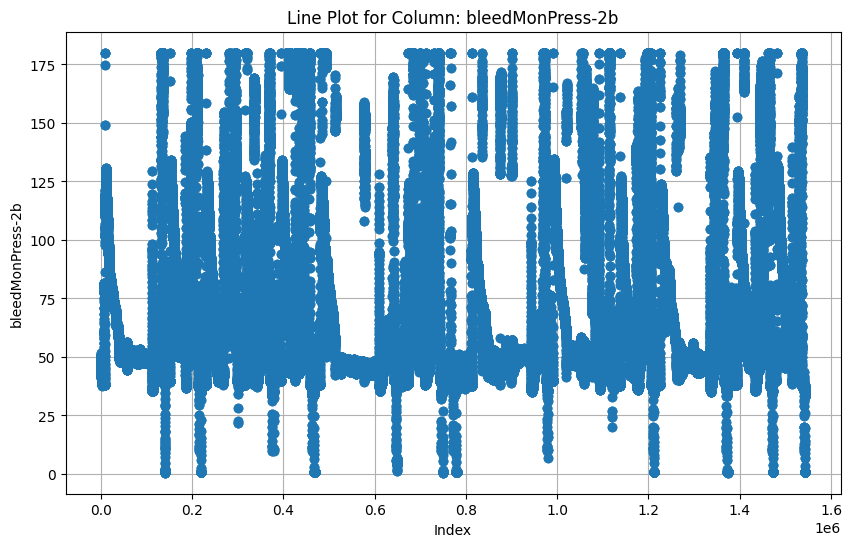

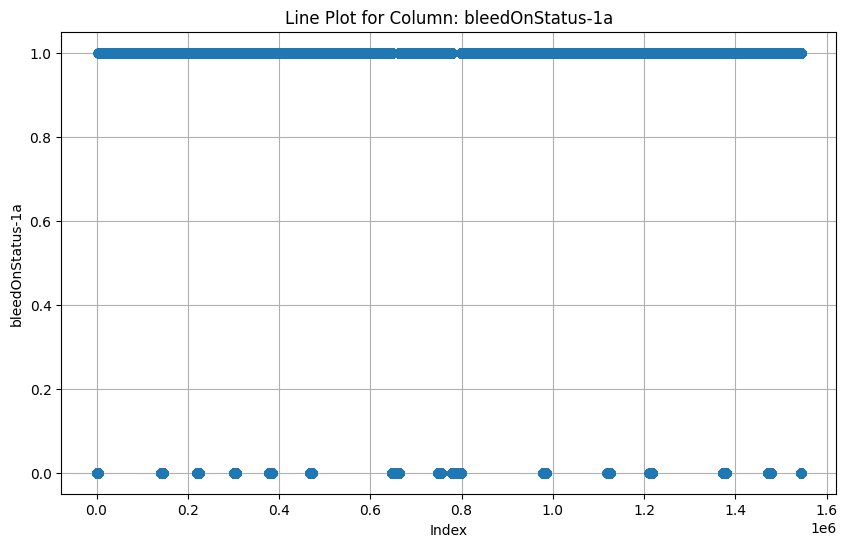

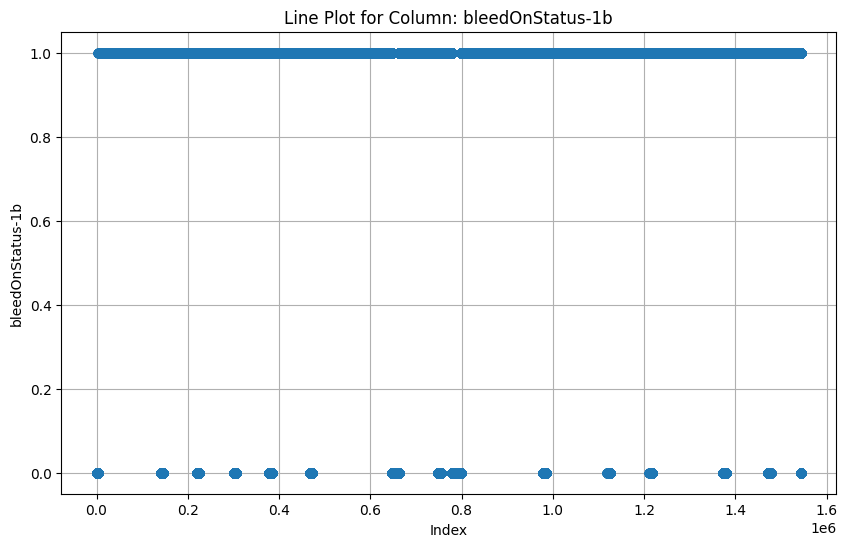

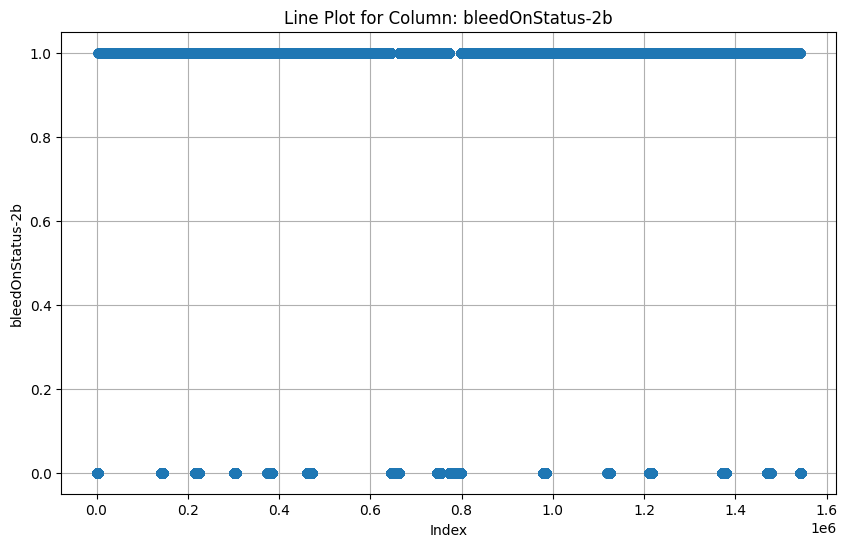

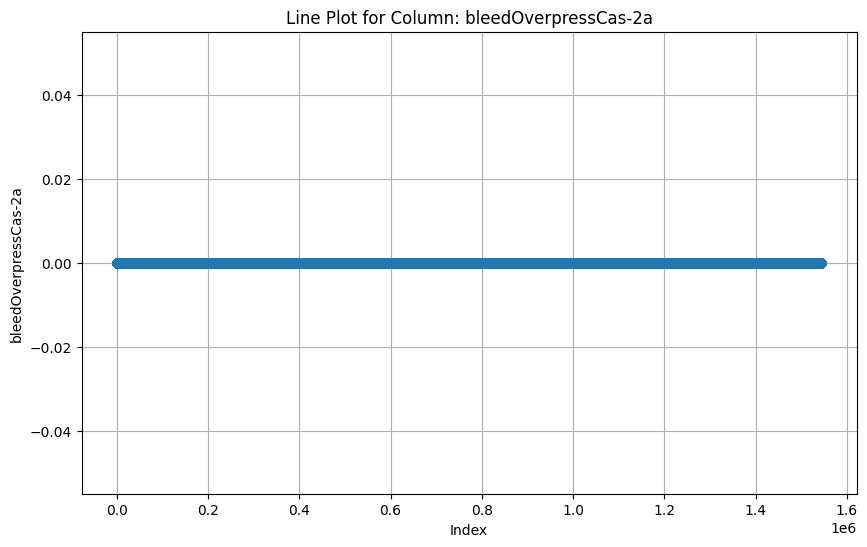

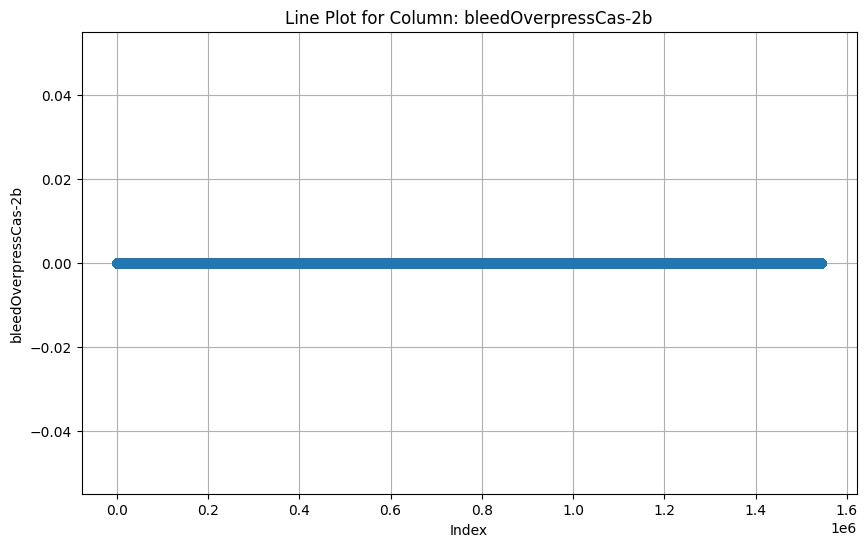

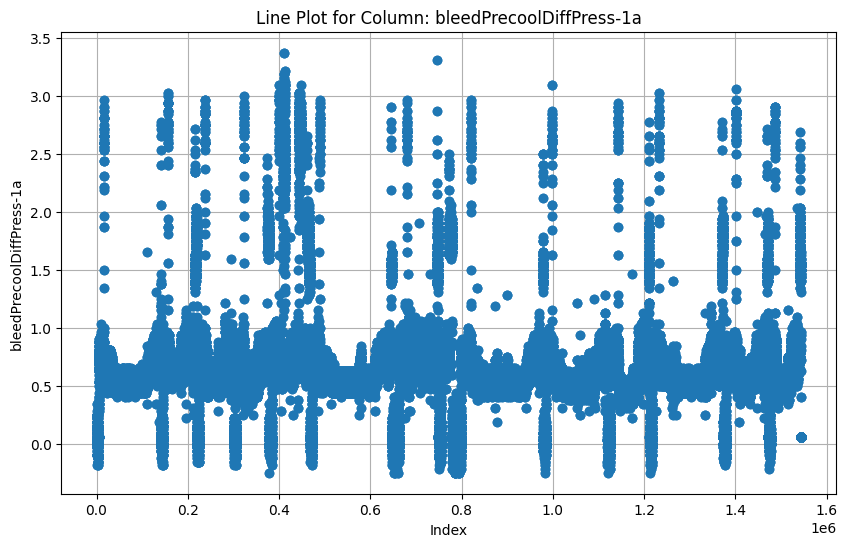

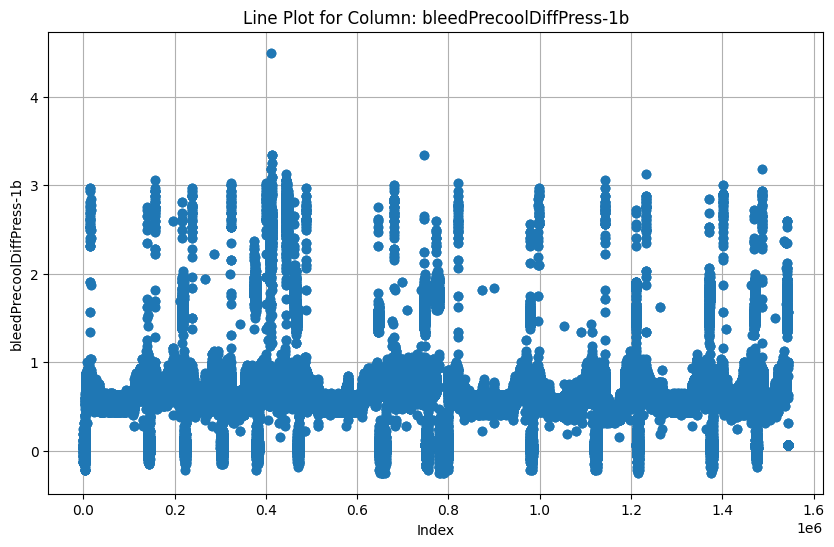

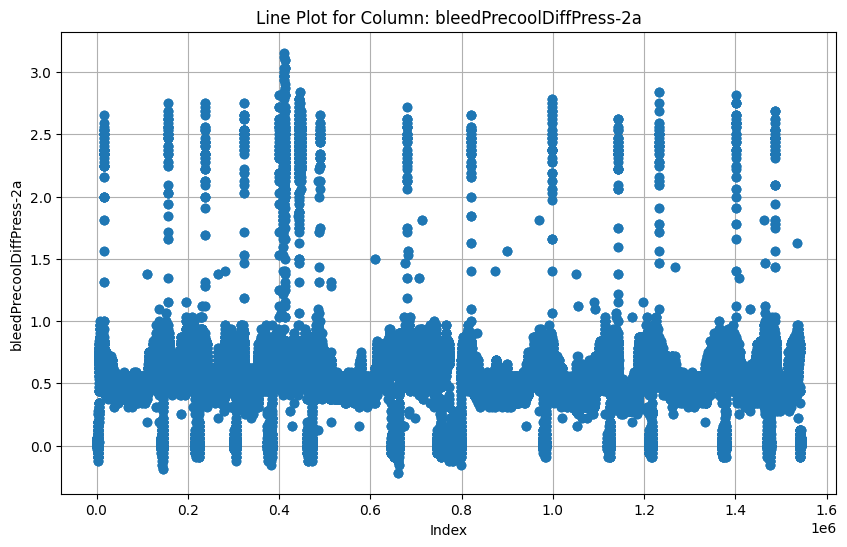

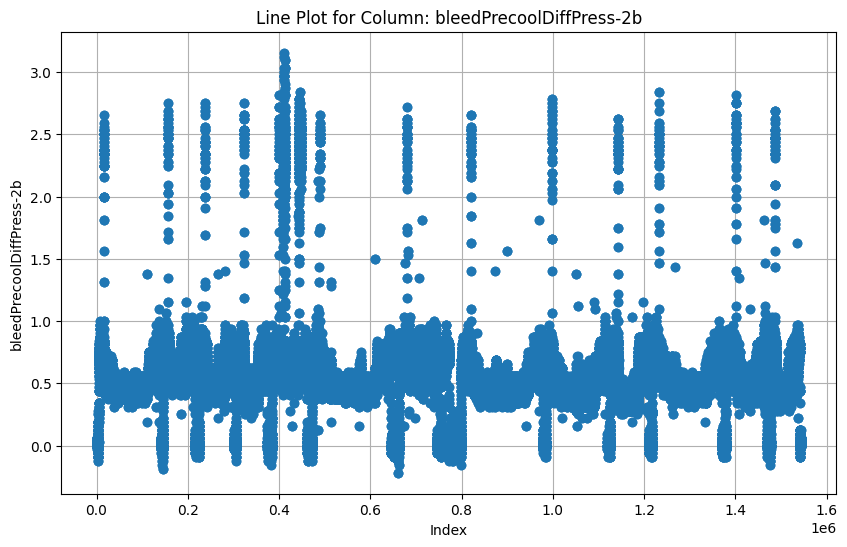

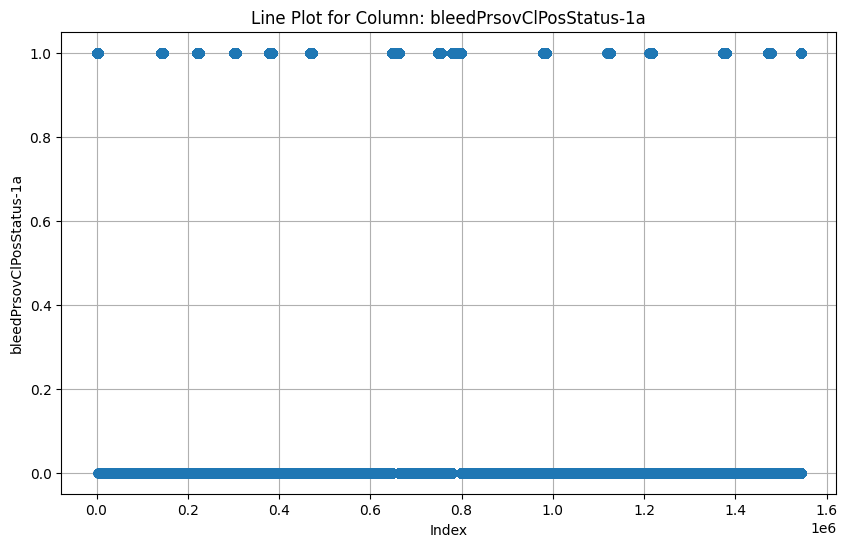

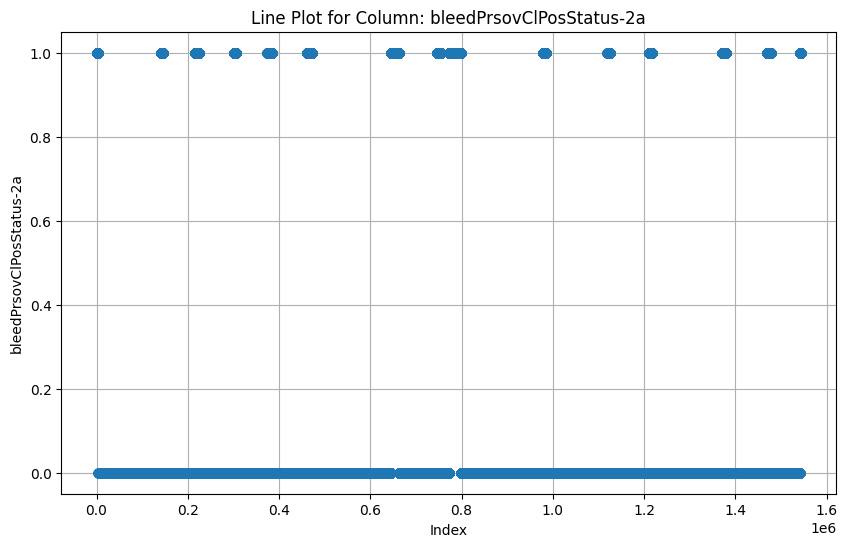

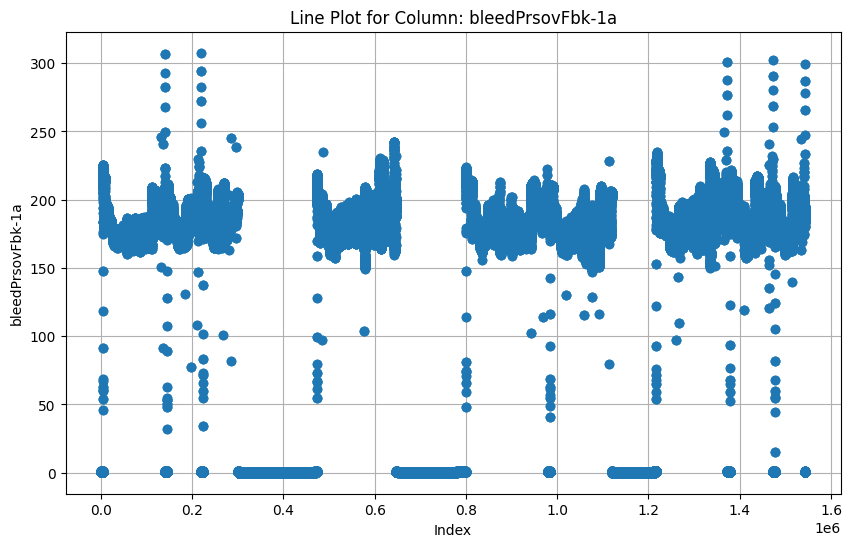

In [31]:
def plot_all_columns(dataframe):
    for col in dataframe.columns:
        print(col)
        try:
            plt.figure(figsize=(10, 6))
            plt.plot(dataframe[col], marker='o')
            plt.title(f'Line Plot for Column: {col}')
            plt.xlabel('Index')
            plt.ylabel(col)
            plt.grid()
        except:
            print(f'Could not plot for column: {col}')

plot_all_columns(flights_combined_data_083)
plt.show()

In [32]:
def drop_same_value_columns(dataframe, columns_to_keep=[]):
    columns_to_drop = []

    for col in dataframe.columns:
        if col not in columns_to_keep and dataframe[col].nunique() == 1:
            columns_to_drop.append(col)

    if columns_to_drop:
        for col in columns_to_drop:
            print(f"Column {col} will be dropped.")

        dataframe = dataframe.drop(columns=columns_to_drop)
        print(f"{len(columns_to_drop)} columns dropped.")

    return dataframe

columns_to_keep = ["recording_time","dateDay-1","dateMonth-1","dateYear-1","phaseOfFlight-1","message0418DAA-1", "message0422DAA-1"]

flights_combined_data_083 = drop_same_value_columns(flights_combined_data_083, columns_to_keep)

Column amscHprsovDrivF-1a will be dropped.
Column amscHprsovDrivF-1b will be dropped.
Column amscHprsovDrivF-2b will be dropped.
Column amscPrsovDrivF-1a will be dropped.
Column amscPrsovDrivF-1b will be dropped.
Column amscPrsovDrivF-2b will be dropped.
Column basBleedLowPressF-1a will be dropped.
Column basBleedLowPressF-2b will be dropped.
Column basBleedLowTempF-1a will be dropped.
Column basBleedLowTempF-2b will be dropped.
Column basBleedOverPressF-1a will be dropped.
Column basBleedOverPressF-2b will be dropped.
Column basBleedOverTempF-1a will be dropped.
Column basBleedOverTempF-2b will be dropped.
Column bleedOverpressCas-2a will be dropped.
Column bleedOverpressCas-2b will be dropped.
16 columns dropped.


In [33]:
flights_combined_data_083

,recording_time,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmCmd-2a,...,bleedOnStatus-1a,bleedOnStatus-1b,bleedOnStatus-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,50,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.03125,-0.0625,0.00000,0.00000,NaN,NaN,0.875
2,100,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,150,26.0,12.0,2022.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543891,3555800,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.06250,0.0625,0.03125,0.03125,NaN,NaN,0.750
1543892,3555850,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1543893,3555900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543894,3555950,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


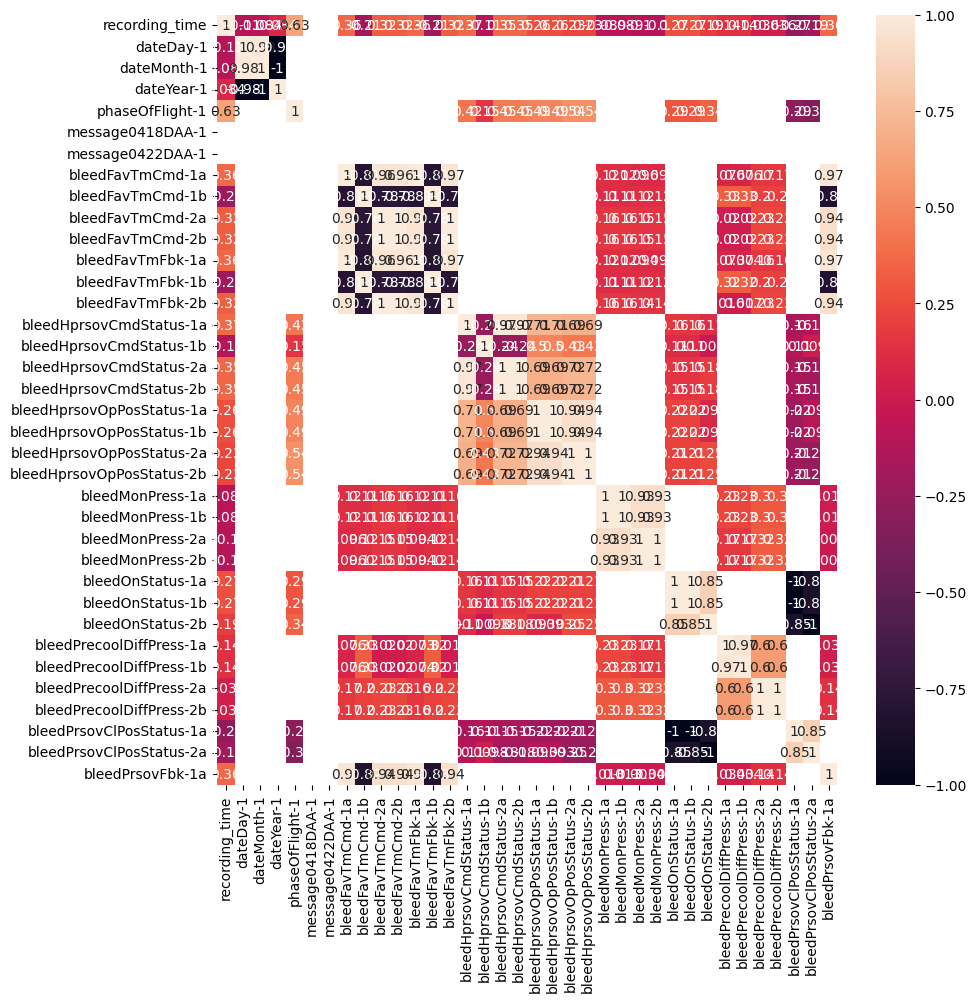

In [34]:
plt.figure(figsize = (10, 10))
corr_matrix = flights_combined_data_083.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [35]:
column_name = "phaseOfFlight-1"
value_counts = flights_combined_data_083[column_name][:1000]
value_counts = flights_combined_data_083[column_name].value_counts()
print(value_counts)


phaseOfFlight-1
0.0    302748
1.0    263903
2.0    205424
Name: count, dtype: int64


In [36]:
for column in flights_combined_data_083.columns:
    if pd.isna(flights_combined_data_083[column].iloc[0]):
        for i in range(1, len(flights_combined_data_083)):
            if not pd.isna(flights_combined_data_083[column].iloc[i]):
                flights_combined_data_083[column].iloc[0] = flights_combined_data_083[column].iloc[i]
                break

flights_combined_data_083 = flights_combined_data_083.fillna(method='ffill')
print(flights_combined_data_083)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_17080\3489604218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_combined_data_083[column].iloc[0] = flights_combined_data_083[column].iloc[i]
C:\Users\Inteli\AppData\Local\Temp\ipykernel_17080\3489604218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_combined_data_083[column].iloc[0] = flights_combined_data_083[column].iloc[i]
C:\Users\Inteli\AppData\Local\Temp\ipykernel_17080\3489604218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

         recording_time  dateDay-1  dateMonth-1  dateYear-1  phaseOfFlight-1   
0                     0       26.0         12.0      2022.0              0.0  \
1                    50       26.0         12.0      2022.0              0.0   
2                   100       26.0         12.0      2022.0              0.0   
3                   150       26.0         12.0      2022.0              0.0   
4                   200       26.0         12.0      2022.0              0.0   
...                 ...        ...          ...         ...              ...   
1543891         3555800       10.0          1.0      2023.0              0.0   
1543892         3555850       10.0          1.0      2023.0              0.0   
1543893         3555900       10.0          1.0      2023.0              0.0   
1543894         3555950       10.0          1.0      2023.0              0.0   
1543895         3556000       10.0          1.0      2023.0              0.0   

         message0418DAA-1  message0422D